In [1]:
# # !apt update && apt install -y libsm6 libxext6
# ! sudo apt-get update
# ! sudo apt-get install -y libsm6 libxext6 libxrender-dev


In [2]:
# ! conda install --yes libgfortran

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns


# from matplotlib.pyplot import subplots

# Open txt
# df_pkm = pd.read_csb("pokemon_data.csv", delimiter='\t')
df_pkm = pd.read_csv("pokemon_data.csv")
df_pkm.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


## Check correlations

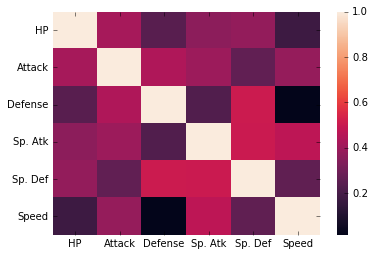

In [4]:
df_pkm_stats = df_pkm[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
df_pkm_cov = np.cov(df_pkm_stats)
df_pkm_corr = df_pkm_stats.corr()

# Weak correlations
ax = sns.heatmap(df_pkm_corr)

## Clustering

In [5]:
from sklearn.preprocessing import normalize
df_pkm_scaled = normalize(df_pkm_stats)
df_pkm_scaled = pd.DataFrame(df_pkm_scaled, columns=df_pkm_stats.columns)
df_pkm_scaled.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0.342109,0.372519,0.372519,0.494157,0.494157,0.342109
1,0.359772,0.371764,0.377761,0.479696,0.479696,0.359772
2,0.371339,0.380622,0.385264,0.464173,0.464173,0.371339
3,0.308577,0.385721,0.474437,0.470580,0.462865,0.308577
4,0.304548,0.406064,0.335784,0.468536,0.390446,0.507580


### Hierchial clustering

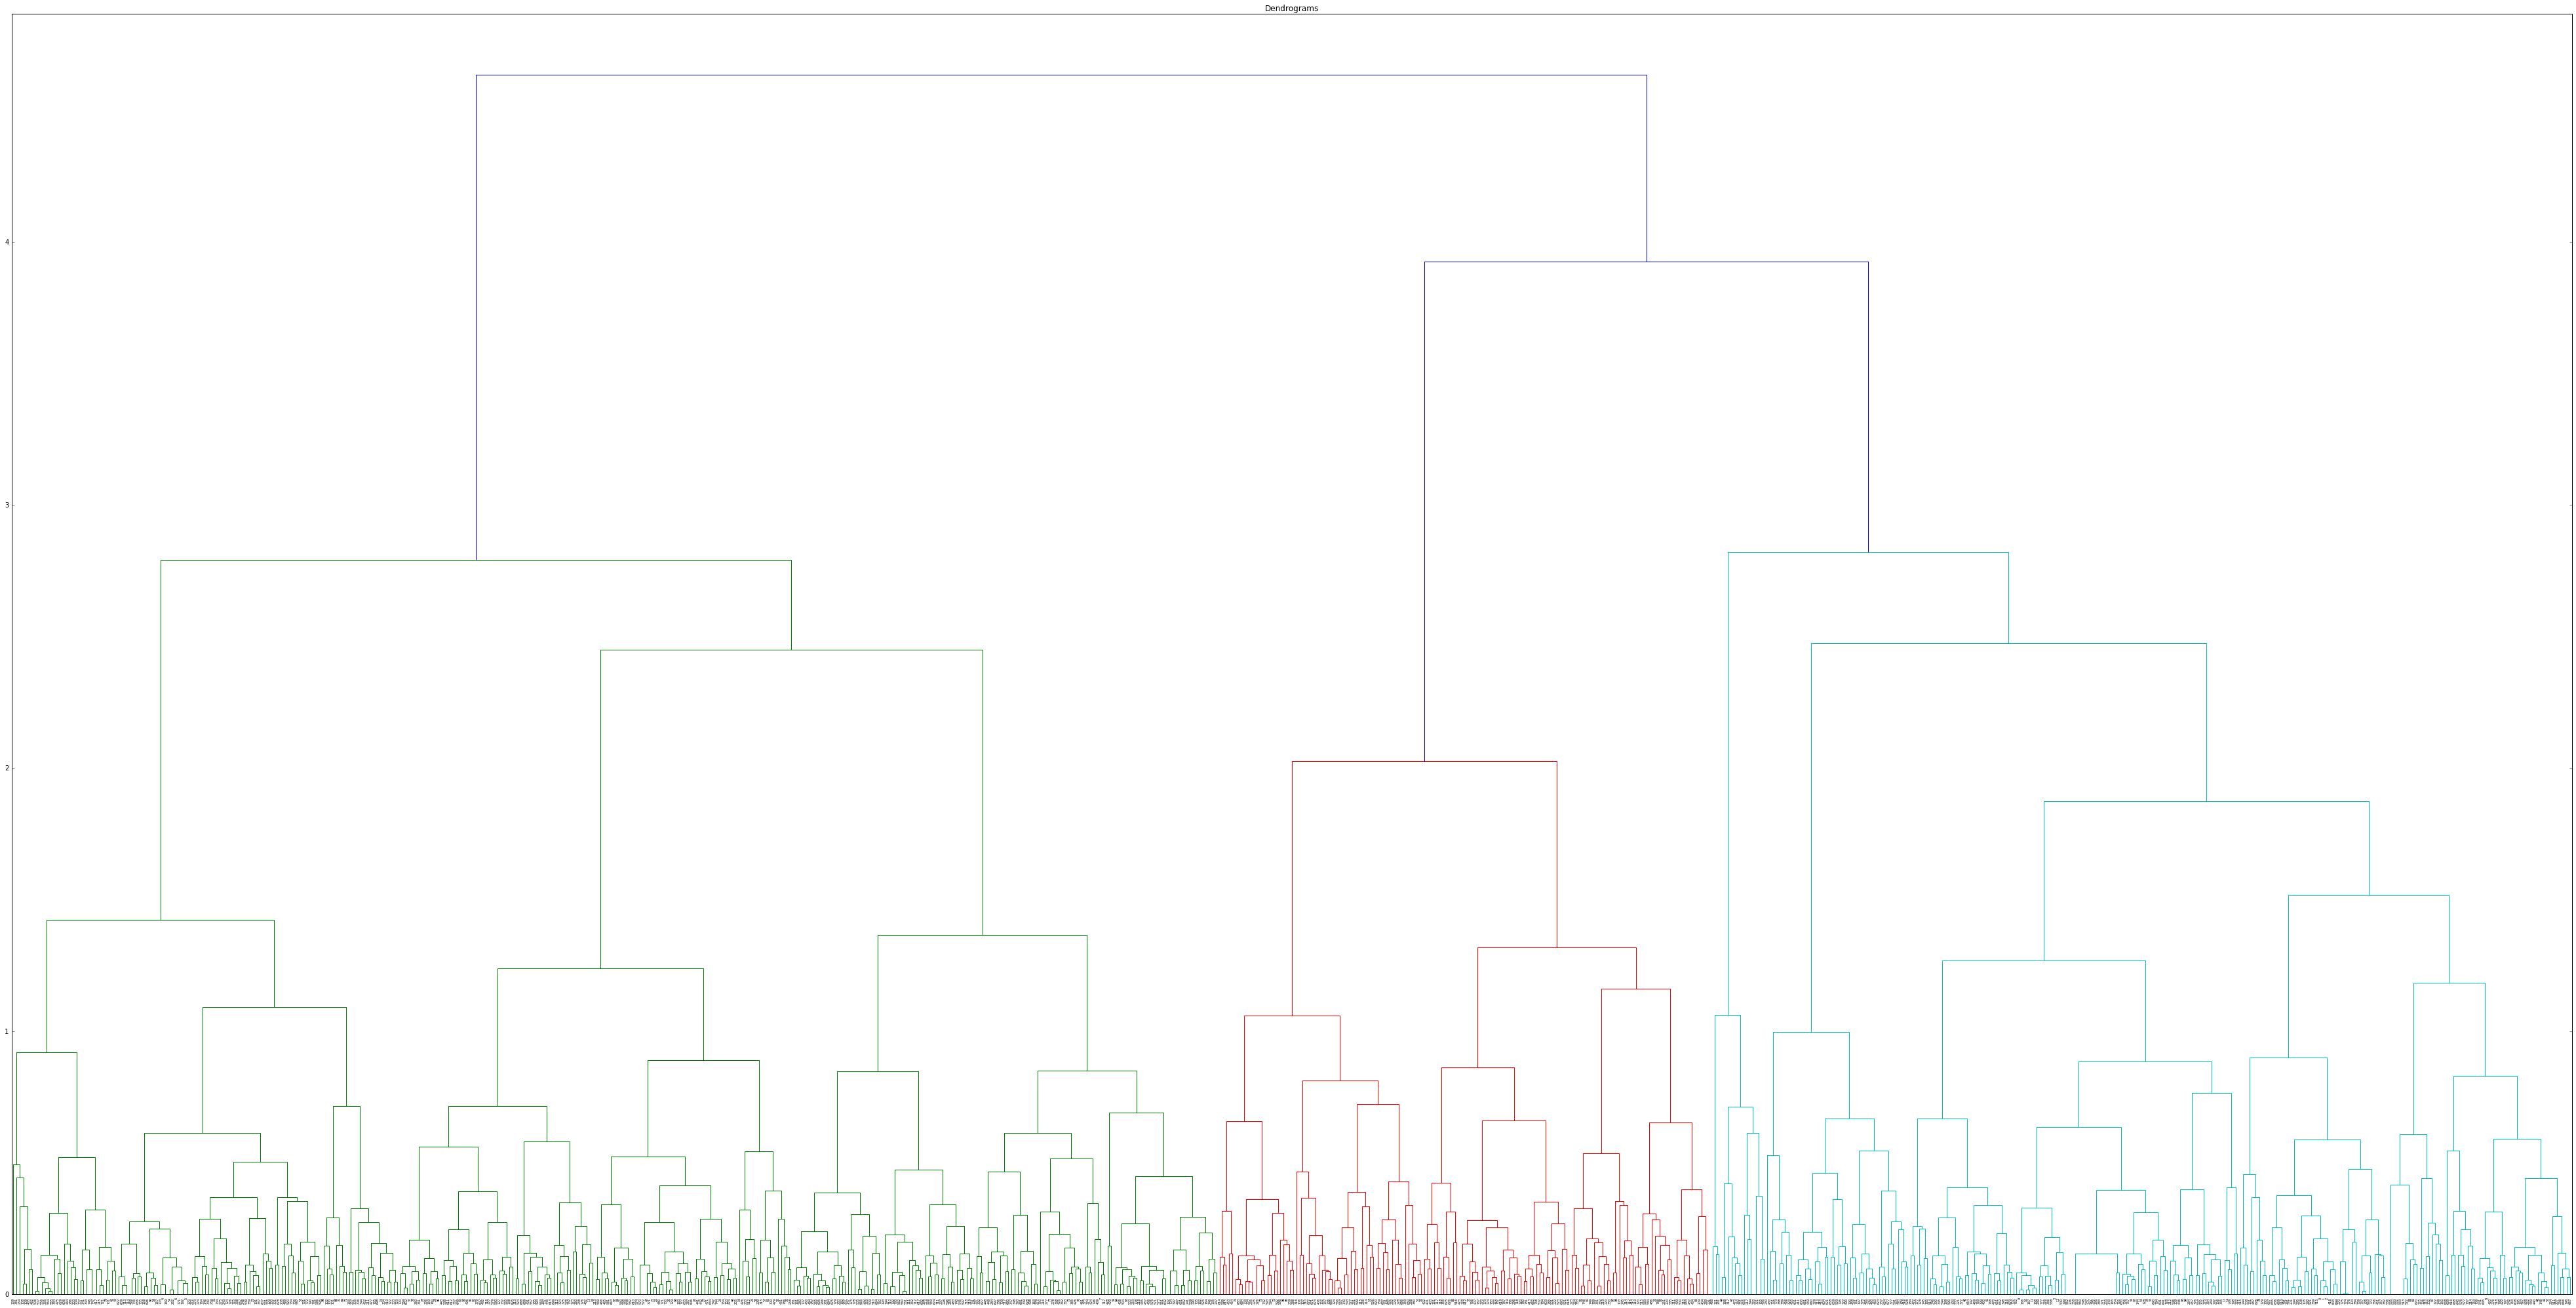

In [6]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(70, 35))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_pkm_scaled, method='ward'))
plt.savefig('pkm_hierchial.png')
plt.savefig('pkm_hierchial.pdf')
plt.savefig('pkm_hierchial.svg', format='svg', dpi=1200)

There are 3 clusters

### Agglomerative clustering

In [7]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df_pkm_scaled)

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 1, 1,
       1, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2,
       1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0,
       0, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2,
       0, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 2, 0,
       1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 0, 0, 2, 1, 1,
       1, 1,

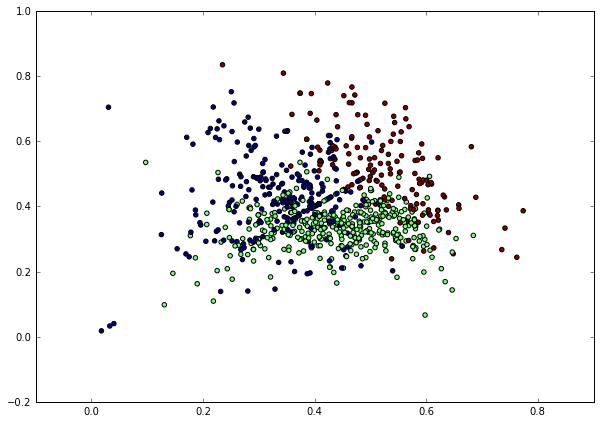

In [8]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_pkm_scaled['Attack'], df_pkm_scaled['Defense'], c=cluster.labels_) 

### DBSCAN Clustering

In [10]:
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 

In [11]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(df_pkm_stats)
labels = db.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [12]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [13]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

0

In [14]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1}